### Edgar Moises Hernandez-Gonzalez
#### 13/05/20
#### Regresion con CNN-1D, LSTM y GRU para predecir el precio de casas de Boston

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Flatten, LSTM, GRU, Dense

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
# escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#convertir de 2D a 3D
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print(x_train.shape)
print(x_test.shape)

(404, 13, 1)
(102, 13, 1)


In [0]:
# mse = 21
def model_cnn_1d():
  model = Sequential()
  model.add(Conv1D(8, 3, activation='relu', input_shape=x_train.shape[1:]))
  model.add(MaxPool1D(2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
# mse = 35
def model_lstm():
  model = Sequential()
  model.add(LSTM(64, activation='tanh', input_shape=x_train.shape[1:]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
# mse = 25
def model_gru():
  model = Sequential()
  model.add(GRU(64, activation='tanh', input_shape=x_train.shape[1:]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
model = model_cnn_1d()
#model = model_lstm()
#model = model_gru()

In [0]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 11, 8)             32        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 5, 8)              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2624      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_test,y_test), verbose=2)

Train on 404 samples, validate on 102 samples
Epoch 1/100
 - 0s - loss: 577.9447 - val_loss: 589.6197
Epoch 2/100
 - 0s - loss: 546.1166 - val_loss: 552.5590
Epoch 3/100
 - 0s - loss: 506.5072 - val_loss: 503.3645
Epoch 4/100
 - 0s - loss: 452.3634 - val_loss: 438.4705
Epoch 5/100
 - 0s - loss: 383.5173 - val_loss: 359.8309
Epoch 6/100
 - 0s - loss: 307.9056 - val_loss: 276.9533
Epoch 7/100
 - 0s - loss: 233.0702 - val_loss: 208.9523
Epoch 8/100
 - 0s - loss: 179.2454 - val_loss: 162.8926
Epoch 9/100
 - 0s - loss: 145.3493 - val_loss: 137.4539
Epoch 10/100
 - 0s - loss: 126.6107 - val_loss: 120.2952
Epoch 11/100
 - 0s - loss: 112.4157 - val_loss: 106.7281
Epoch 12/100
 - 0s - loss: 100.4024 - val_loss: 95.1188
Epoch 13/100
 - 0s - loss: 90.3021 - val_loss: 85.6669
Epoch 14/100
 - 0s - loss: 82.7607 - val_loss: 77.9962
Epoch 15/100
 - 0s - loss: 75.7260 - val_loss: 71.6581
Epoch 16/100
 - 0s - loss: 70.9430 - val_loss: 66.7892
Epoch 17/100
 - 0s - loss: 66.6907 - val_loss: 63.0526
Epoch

In [0]:
test_loss = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)

Test loss: 21.030992246141622


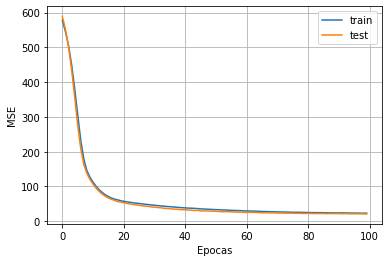

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.show()

In [0]:
predicciones = model.predict(x_test)

In [0]:
df_y_test = pd.DataFrame(y_test, columns=['y_test'])
df_pred = pd.DataFrame(predicciones, columns=['predicciones'])
comparar = pd.concat([df_y_test, df_pred], axis=1)
comparar

,y_test,predicciones
0,7.2,12.294716
1,18.8,13.780217
2,19.0,23.135115
3,27.0,26.504263
4,22.2,22.952072
...,...,...
97,21.9,31.005936
98,24.1,25.307194
99,50.0,33.033791
100,26.7,33.189625


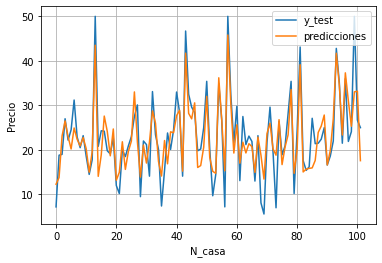

In [0]:
plt.plot(y_test)
plt.plot(predicciones)
plt.grid()
plt.xlabel('N_casa')
plt.ylabel('Precio')
plt.legend(['y_test', 'predicciones'])
plt.show()